# library import

In [20]:
import re
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Flatten

from sklearn.utils import class_weight
import numpy as np

# 이후 모델 구성 및 학습 코드
import gdown

#import warnings
#warnings.filterwarnings(action='ignore')

# data load

In [3]:
!git clone https://github.com/jeongminia/Cancer-Classification.git
!unzip -qq '/content/Cancer-Classification/data/open.zip'
!unzip -qq '/content/Cancer-Classification/data/preprocessed_data.zip'

Cloning into 'Cancer-Classification'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 184 (delta 80), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (184/184), 12.82 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
# 공유 링크에서 ID 추출
url = f"https://drive.google.com/uc?id=1TP-l24eJn_oZVlOG8KLQHkK4W0wRUqKV"

# 파일 다운로드
output = 'preprocessed_trainv2.csv'
gdown.download(url, output, quiet=False)

# 데이터프레임으로 읽기
train = pd.read_csv(output)

# 공유 링크에서 ID 추출
url = f"https://drive.google.com/uc?id=1-RkNKFSRLFVG0LawcfEMTv1t-zIhoOZJ"

# 파일 다운로드
output = 'preprocessed_trainv2.csv'
gdown.download(url, output, quiet=False)

# 데이터프레임으로 읽기
test = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1TP-l24eJn_oZVlOG8KLQHkK4W0wRUqKV
To: /content/preprocessed_trainv2.csv
100%|██████████| 54.3M/54.3M [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-RkNKFSRLFVG0LawcfEMTv1t-zIhoOZJ
To: /content/preprocessed_trainv2.csv
100%|██████████| 22.3M/22.3M [00:00<00:00, 128MB/s] 


In [4]:
train = pd.read_csv('/content/preprocessed_train.csv')
test = pd.read_csv('/content/preprocessed_test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [5]:
print(train)
print(test)

      Unnamed: 0          ID  SUBCLASS  A2M  AAAS  AADAT  AARS1  ABAT  ABCA1  \
0              0  TRAIN_0000         8    1     1      1      1     1      1   
1              1  TRAIN_0001        19    1     1      1      1     1      1   
2              2  TRAIN_0002        20    1     1      1      1     1      1   
3              3  TRAIN_0003         9    1     1      1      1     1      1   
4              4  TRAIN_0004         6    1     1      1      1     1      1   
...          ...         ...       ...  ...   ...    ...    ...   ...    ...   
6196        6196  TRAIN_6196        13    1     1      1      1     1      1   
6197        6197  TRAIN_6197        11    1     1      1      1     1      1   
6198        6198  TRAIN_6198         4    1     1      1      1     1      1   
6199        6199  TRAIN_6199        22    1     1      1      1     1      1   
6200        6200  TRAIN_6200        20    1     1      1      1     1      1   

      ABCA2  ...  ZNF365  ZNF639  ZNF70

# data split


In [6]:
X = train.drop(columns=['Unnamed: 0', 'SUBCLASS', 'ID'])
y = train['SUBCLASS']

In [7]:
X

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,mutation_cnt
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,18
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,12
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,85
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33
6197,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,8
6198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,10,1,13
6199,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [8]:
y

,SUBCLASS
0,8
1,19
2,20
3,9
4,6
...,...
6196,13
6197,11
6198,4
6199,22


In [9]:
# 범주형 변수를 찾기
cat_features_indices = X.select_dtypes(include=['object']).columns

# 범주형 변수의 인덱스 찾기
cat_feature_indices = [X.columns.get_loc(col) for col in cat_features_indices]

print("범주형 변수 인덱스:", cat_feature_indices)

범주형 변수 인덱스: []


In [10]:
# 데이터 분할 (각 클래스 비율 유지)
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # 각 클래스 비율 유지
)

# model train

In [26]:
print(np.unique(y_train))  # y_train에 실제 존재하는 클래스 값 출력

print("Class Weights Dictionary:", class_weights_dict)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Class Weights Dictionary: {0: 3.2891246684350133, 1: 2.298424467099166, 2: 0.3032897150544209, 3: 1.5384615384615385, 4: 1.0717372515125325, 5: 6.153846153846154, 6: 0.5169897852824682, 7: 1.0717372515125325, 8: 0.4630321135175504, 9: 0.7144915010083549, 10: 1.514041514041514, 11: 1.0424548129466162, 12: 1.5021199273167778, 13: 1.2977498691784406, 14: 1.3434452871072589, 15: 0.9444021325209444, 16: 1.9871794871794872, 17: 1.6166883963494132, 18: 0.8956301914048392, 19: 1.2074001947419668, 20: 0.8632091890010442, 21: 0.6296014216806296, 22: 1.926961926961927, 23: 0.7365607365607365, 24: 2.4148003894839336, 25: 1.2074001947419668}


In [27]:
y_train = y_train.astype(int)

In [32]:
# hyperparameters
num_epochs = 200
learning_rate = 1e-3
dropout = 0.2

# y_train에 실제 존재하는 클래스 확인
classes = np.unique(y_train)

# 클래스별 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)

# 클래스 가중치를 y_train의 고유한 클래스에 맞게 매핑
class_weights_dict = dict(zip(classes, class_weights))
class_weights_dict = {int(k): float(v) for k, v in class_weights_dict.items()}
sample_weights = np.array([class_weights_dict[cls] for cls in y_train])


### 1-D CNN
model = tf.keras.Sequential()

# Input 레이어 추가
model.add(tf.keras.Input(shape=(4385,)))  # 입력 형태 지정
model.add(tf.keras.layers.Reshape((4385, 1)))  # 데이터를 (batch_size, features, 1)로 변환

# Conv1D 레이어 추가
model.add(tf.keras.layers.Conv1D(64, kernel_size=4, activation='relu'))  # 첫 번째 Conv1D 레이어
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# 추가적인 Conv1D 레이어
model.add(tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'))  # 두 번째 Conv1D 레이어
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Flatten 레이어
model.add(tf.keras.layers.Flatten())

# 첫 번째 Dense 레이어
model.add(tf.keras.layers.Dense(256, activation='relu'))  # 첫 번째 Dense 레이어
model.add(tf.keras.layers.Dropout(dropout))  # Dropout으로 과적합 방지

# 추가적인 Dense 레이어
model.add(tf.keras.layers.Dense(128, activation='relu'))  # 두 번째 Dense 레이어
model.add(tf.keras.layers.Dropout(dropout))  # Dropout 추가

# 출력 레이어
model.add(tf.keras.layers.Dense(26, activation='softmax'))

# 모델 컴파일 및 학습
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=64, validation_data=(X_val, y_val), sample_weight=sample_weights)

# Evaluate the model on the test data
score, accuracy = model.evaluate(X_val, y_val, batch_size=64)
print('Val score:', score)
print('Val accuracy:', accuracy)

# F1 score
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
f1score = f1_score(y_val, y_pred, average='macro')
print('val f1 : ', f1score)

Epoch 1/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.0632 - loss: 4497.8892 - val_accuracy: 0.0266 - val_loss: 3.5984
Epoch 2/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.0356 - loss: 3.8041 - val_accuracy: 0.0234 - val_loss: 3.2815
Epoch 3/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.0424 - loss: 3.2740 - val_accuracy: 0.0234 - val_loss: 3.2831
Epoch 4/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.0262 - loss: 3.2656 - val_accuracy: 0.0234 - val_loss: 3.2831
Epoch 5/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.0251 - loss: 3.2090 - val_accuracy: 0.0234 - val_loss: 3.2819
Epoch 6/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.0363 - loss: 3.2420 - val_accuracy: 0.0749 - val_loss: 3.2823
Epoch 7/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.0231 - loss: 3.2503 - val_accuracy: 0.0234 - val_loss: 3.2811
Epoch 8/200
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.0442 - loss: 3.2252 - val_accuracy

# model evaluation

In [34]:
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[6.44913688e-02 2.51640398e-02 7.53139704e-02 ... 9.47956927e-03
  7.33765541e-03 2.10972894e-02]
 [7.47643225e-03 7.72377942e-04 5.56372963e-02 ... 4.31149005e-04
  3.20126186e-04 4.70448881e-02]
 [5.69328479e-02 6.66734427e-02 1.00097924e-01 ... 7.97295525e-06
  1.34385266e-06 1.54734284e-01]
 ...
 [7.78206531e-03 7.82449637e-03 6.13316223e-02 ... 3.85613041e-03
  3.45069659e-03 1.01981789e-01]
 [3.39957565e-04 7.27143415e-05 8.61359201e-03 ... 1.03957043e-03
  1.47579028e-03 1.23184714e-02]
 [3.35341059e-02 9.65562016e-02 3.26606333e-02 ... 2.65186955e-03
  1.15054334e-03 1.45240147e-02]]
[22  5  3 ...  6 11 14]


<Figure size 1200x800 with 0 Axes>

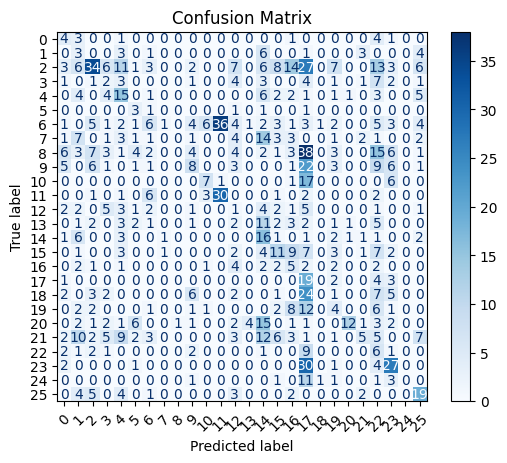

In [35]:
# confusion matrix 계산
cm = confusion_matrix(y_val, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

# predict SUBCLASS

In [36]:
X_test = test.drop(columns=['ID'])
print(X_test)

      A2M  AAAS  AADAT  AARS1  ABAT  ABCA1  ABCA2  ABCA3  ABCA4   ABCA5  ...  \
0       1     1      1      1     1      1      1      1      1       1  ...   
1       1     1      1      1     1     10      1      1      1       1  ...   
2       1     1      1      1     1      1      1      1      1       1  ...   
3       1     1      1      1     1      1      1      1      1       1  ...   
4       1     1      1      1     1      1      1      1      1       1  ...   
...   ...   ...    ...    ...   ...    ...    ...    ...    ...     ...  ...   
2541    1     1      1      1     1      1      1      1      1       1  ...   
2542    1     1      1      1     1      1      1      1      1       1  ...   
2543    1     1      1      1     1     10      1     10     10  100000  ...   
2544    1     1      1      1     1      1      1      1     10       1  ...   
2545    1     1      1      1     1      1      1      1      1       1  ...   

      ZNF365  ZNF639  ZNF707  ZNFX1   Z

In [38]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[15 21 22 ...  4 17 10]


In [39]:
# 레이블 변환을 위한 맵 딕셔너리
label_map = {
    0: "ACC",
    1: "BLCA",
    2: "BRCA",
    3: "CESC",
    4: "COAD",
    5: "DLBC",
    6: "GBMLGG",
    7: "HNSC",
    8: "KIPAN",
    9: "KIRC",
    10: "LAML",
    11: "LGG",
    12: "LIHC",
    13: "LUAD",
    14: "LUSC",
    15: "OV",
    16: "PAAD",
    17: "PCPG",
    18: "PRAD",
    19: "SARC",
    20: "SKCM",
    21: "STES",
    22: "TGCT",
    23: "THCA",
    24: "THYM",
    25: "UCEC"
}

# y_pred 값 변환
predictions_transformed = [label_map[pred] for pred in predictions]

# 변환된 y_pred 출력
print(predictions_transformed)

['OV', 'STES', 'TGCT', 'LGG', 'LUSC', 'PAAD', 'UCEC', 'UCEC', 'PCPG', 'SARC', 'PCPG', 'THCA', 'COAD', 'BLCA', 'PCPG', 'CESC', 'OV', 'PCPG', 'TGCT', 'TGCT', 'COAD', 'LUSC', 'LGG', 'LIHC', 'LIHC', 'LUSC', 'LUSC', 'UCEC', 'COAD', 'PCPG', 'UCEC', 'COAD', 'BLCA', 'TGCT', 'PCPG', 'COAD', 'LGG', 'PCPG', 'BLCA', 'LUSC', 'TGCT', 'LGG', 'LUSC', 'UCEC', 'BRCA', 'BLCA', 'TGCT', 'LIHC', 'PAAD', 'BLCA', 'COAD', 'TGCT', 'COAD', 'SARC', 'LUSC', 'PAAD', 'COAD', 'CESC', 'BLCA', 'LUSC', 'CESC', 'COAD', 'PAAD', 'COAD', 'PCPG', 'BLCA', 'CESC', 'LUSC', 'ACC', 'CESC', 'LUSC', 'CESC', 'COAD', 'LUSC', 'PCPG', 'PCPG', 'LUSC', 'LUSC', 'BLCA', 'LUSC', 'LIHC', 'BLCA', 'STES', 'LUSC', 'BLCA', 'LUSC', 'CESC', 'LIHC', 'LUSC', 'COAD', 'THCA', 'PCPG', 'COAD', 'BLCA', 'PCPG', 'ACC', 'BLCA', 'UCEC', 'LUSC', 'UCEC', 'PCPG', 'TGCT', 'LIHC', 'LGG', 'LAML', 'BLCA', 'STES', 'PCPG', 'CESC', 'BLCA', 'PCPG', 'PCPG', 'UCEC', 'PCPG', 'LUSC', 'PCPG', 'LIHC', 'LAML', 'PCPG', 'CESC', 'COAD', 'LIHC', 'LUSC', 'TGCT', 'THCA', 'PAAD', 'P

In [40]:
print("predictions의 길이:", len(predictions_transformed))
print("submisson의 길이:", len(submission))

predictions의 길이: 2546
submisson의 길이: 2546


In [41]:
#predictions_transformed = predictions_transformed.ravel()  # 또는 predictions.flatten()
submission["SUBCLASS"] = predictions_transformed

In [42]:
submission.to_csv('submission.csv', encoding='UTF-8-sig', index=False)